In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
weather = pd.read_csv('weather.csv')
athletes = pd.read_csv('athletes.csv')

In [9]:
weather.shape

(8784, 5)

In [106]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MONTH     8784 non-null   int64  
 1   DAY       8784 non-null   int64  
 2   TIME      8784 non-null   int64  
 3   TEMP      8784 non-null   float64
 4   PRESSURE  8784 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 343.2 KB


In [11]:
weather

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230
...,...,...,...,...,...
8779,12,366,20,3.5,10265
8780,12,366,21,3.4,10258
8781,12,366,22,3.0,10253
8782,12,366,23,2.8,10246


In [85]:
weather.describe()

,MONTH,DAY,TIME,TEMP,PRESSURE
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,6.513661,183.500000,12.500000,10.768613,10159.254781
std,3.451430,105.660719,6.922581,6.420003,102.895130
min,1.000000,1.000000,1.000000,-6.500000,9812.000000
25%,4.000000,92.000000,6.750000,6.100000,10102.000000
50%,7.000000,183.500000,12.500000,10.200000,10169.000000
75%,10.000000,275.000000,18.250000,15.900000,10227.000000
max,12.000000,366.000000,24.000000,31.700000,10453.000000


In [24]:
weather.PRESSURE.min()

9812

In [28]:
weather['PRESSURE'].mode()

0    10215
dtype: int64

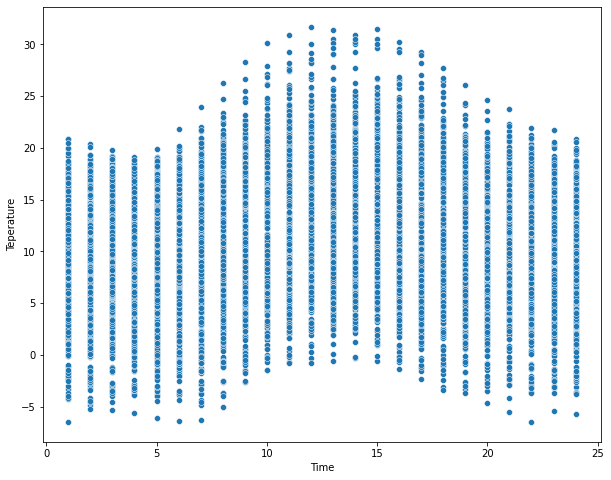

In [164]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='TIME', y='TEMP', data=weather)

plt.xlabel('Time')
plt.ylabel('Teperature')

plt.show()

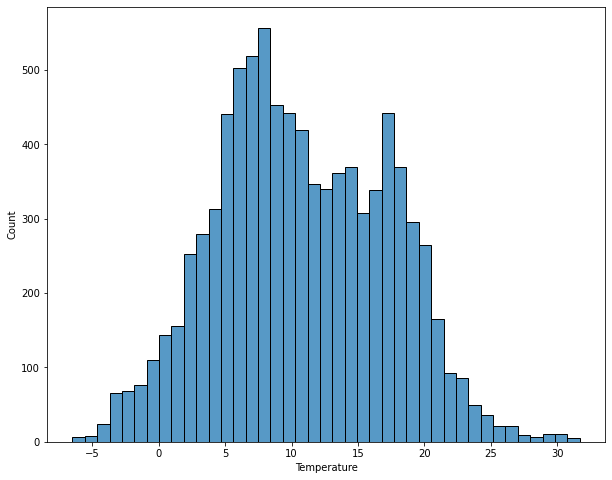

In [165]:
plt.figure(figsize=(10, 8))

sns.histplot(x='TEMP', data=weather)
plt.xlabel('Temperature')

plt.show()

In [58]:
weather.loc[0:4,["TEMP"]] 

,TEMP
0,6.8
1,5.8
2,5.7
3,6.0
4,4.5


In [167]:
weather.loc[0:0,["TEMP"]]

,TEMP
0,6.8


In [170]:
temp2_3=weather.loc[2:3,["TEMP"]]

In [174]:
temp2_3

,TEMP
2,5.7
3,6.0


In [16]:
tempandpressure2_3=weather.loc[2:3,["TEMP","PRESSURE"]]

In [11]:
tempandpressure2_3

,TEMP,PRESSURE
2,5.7,10220
3,6.0,10225


In [24]:
tempgreaterthan6 = weather.loc[(weather['TEMP'] > 6)]
print(tempgreaterthan6)

      MONTH  DAY  TIME  TEMP  PRESSURE
0         1    1     1   6.8     10207
10        1    1    11   7.2     10245
11        1    1    12   7.9     10239
12        1    1    13   7.7     10231
13        1    1    14   7.2     10225
...     ...  ...   ...   ...       ...
8676     12  362    13   9.0     10424
8677     12  362    14   8.4     10426
8678     12  362    15   8.0     10431
8679     12  362    16   6.3     10430
8680     12  362    17   6.1     10436

[6623 rows x 5 columns]


In [25]:
weather.TEMP=weather.TEMP + 1

In [29]:
weather.TEMP

0       7.8
1       6.8
2       6.7
3       7.0
4       5.5
       ... 
8779    4.5
8780    4.4
8781    4.0
8782    3.8
8783    3.8
Name: TEMP, Length: 8784, dtype: float64

In [31]:
weather.sort_values(by=['TEMP'])

,MONTH,DAY,TIME,TEMP,PRESSURE
8016,11,335,1,-5.5,10335
8013,11,334,22,-5.5,10344
437,1,19,6,-5.4,10160
438,1,19,7,-5.3,10160
436,1,19,5,-5.1,10161
...,...,...,...,...,...
4834,7,202,11,31.9,10105
5701,8,238,14,31.9,10143
4836,7,202,13,32.4,10105
5702,8,238,15,32.5,10138


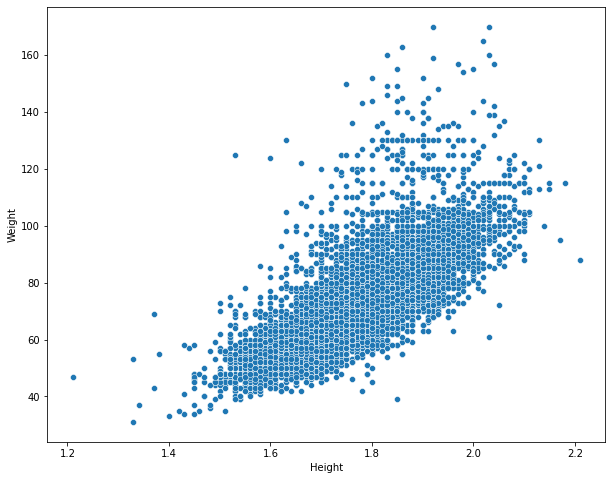

In [80]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='height', y='weight', data=athletes)

plt.xlabel('Height')
plt.ylabel('Weight')

plt.show()

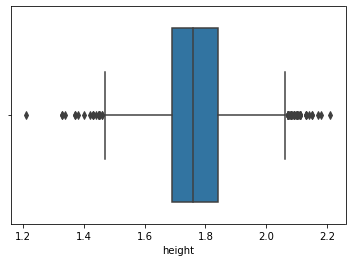

In [83]:
sns.boxplot(x="height", data=athletes);

In [108]:
heights=athletes.height

In [109]:
q1 = heights.quantile(.25)
q3 = heights.quantile(.75)
iqr = q3 - q1 
pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr

In [110]:
new_heights = heights.where(heights.between(pmin, pmax))

In [159]:
compare = pd.DataFrame({'before':heights, 'after':new_heights})

<AxesSubplot:>

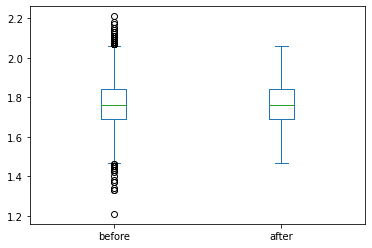

In [160]:
compare.plot.box()

In [162]:
compare.describe()

,before,after
count,11213.000000,11121.000000
mean,1.766294,1.765098
std,0.112702,0.108867
min,1.210000,1.470000
25%,1.690000,1.690000
50%,1.760000,1.760000
75%,1.840000,1.840000
max,2.210000,2.060000
